In [22]:
# Scikit-Learn provides the popular datasets easily
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

In [23]:
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- "data" Key -> Contains the data
- "target" Key -> Contains the labels
- "DESCR" Key -> Contains data description

In [24]:
data = mnist["data"]
labels = mnist["target"]
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Each row is an image with 28x28 pixels but aligned in one row

(-0.5, 27.5, 27.5, -0.5)

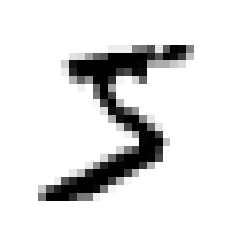

In [25]:
# to show one image
digit = data.iloc[0].values.reshape(28, 28)
plt.imshow(digit, cmap="binary")
plt.axis("off")

In [26]:
labels[0] # Yes, the img up there is 5

'5'

In [27]:
# Casting labels to integer instead of strings.
labels = labels.astype(np.uint8)

In [28]:
train_data, train_labels = data[:60000], labels[:60000]
test_data, test_labels = data[60000:], labels[60000:]

### Starting with a binary classifier
Only differentiate 5 and not-5

In [29]:
train_labels_5 = (train_labels == 5)
test_labels_5 = (test_labels == 5)

In [30]:
# Let's start with Stochastic Gradiant Descent (SGD)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(train_data, train_labels_5)

SGDClassifier(random_state=42)

In [36]:
# Testing SGD
print(sgd_clf.predict([train_data.iloc[10]])) # Result is False, the number is not 5
print(train_labels[10]) # This number is 3
# Hurray!

[False]
3


/Users/oabuhamdan/PycharmProjects/Hands_On_ML_Workspace/venv/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
